In [1]:
from scipy.optimize import brentq
from scipy.interpolate import interp1d
from sklearn.metrics import accuracy_score, log_loss, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/home/ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
def calculate_eer(labels, scores):


    # Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
    fpr, tpr, thresholds = roc_curve(labels, scores, pos_label=1)

    plot_eer(fpr, tpr, thresholds)
    
    # Interpolate the FPR and TPR values
    interpolated = interp1d(fpr, tpr)

    # Find the point where FAR and FRR are equal (EER)
    eer = brentq(lambda x : 1. - x - interpolated(x), 0., 1.)

    optimal_threshold = thresholds[np.nanargmin(np.abs((1. - tpr) - fpr))]
    
    print('EER: ', eer)
    print('Optimal Threshold: ', optimal_threshold)

    return eer, optimal_threshold

In [3]:
def plot_eer(fpr, tpr, threshold):
    sns.lineplot(x=threshold[1:], y=fpr[1:], label='false positive rate')
    sns.lineplot(x=threshold[1:], y=(1-tpr[1:]), label='false negative rate')
    plt.legend()
    plt.show()
    

# Test #1: All Correct

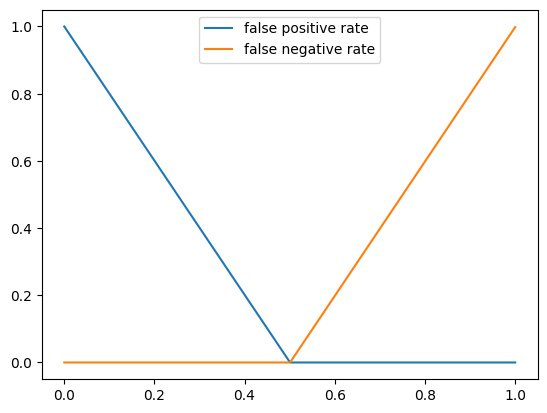

EER:  0.0
Optimal Threshold:  0.5009482230494217


(0.0, 0.5009482230494217)

In [4]:
scores = np.random.random(1000)
labels = np.where(scores > 0.5, 1, 0)
calculate_eer(labels, scores)

# Test #2: All Correct At Lower Threshold

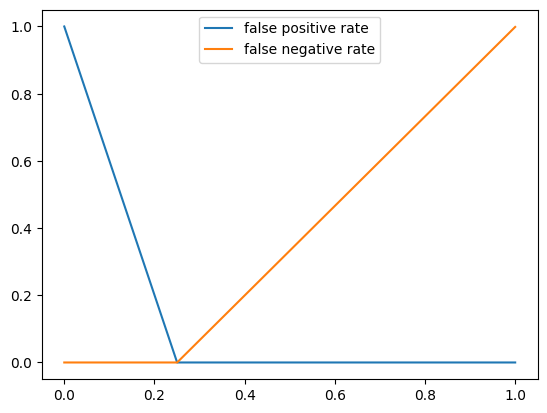

EER:  0.0
Optimal Threshold:  0.2505521984281073


(0.0, 0.2505521984281073)

In [5]:
scores = np.random.random(1000)
labels = np.where(scores > 0.25, 1, 0)
calculate_eer(labels, scores)

# Test #3: All Correct At Higher Threshold

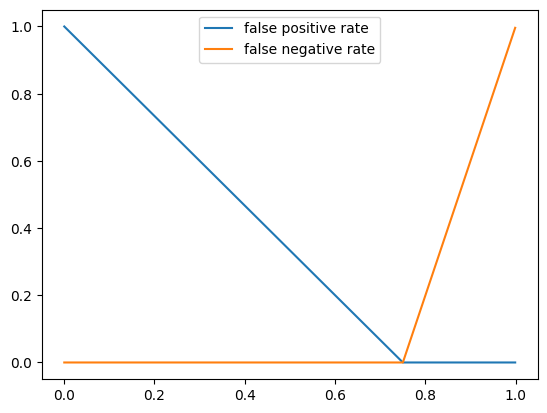

EER:  0.0
Optimal Threshold:  0.7501856681417323


(0.0, 0.7501856681417323)

In [6]:
scores = np.random.random(1000)
labels = np.where(scores > 0.75, 1, 0)
calculate_eer(labels, scores)

# Test #4: All Wrong

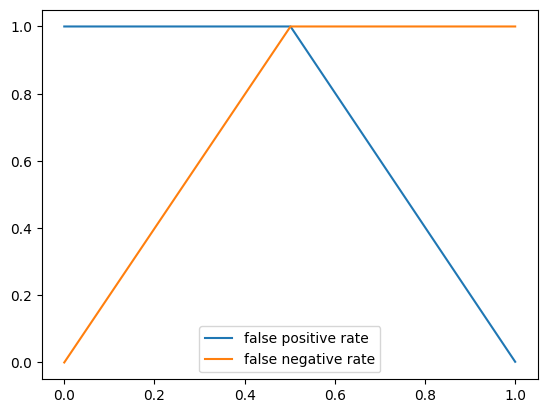

EER:  0.9999999999987873
Optimal Threshold:  0.5017998360321414


(0.9999999999987873, 0.5017998360321414)

In [7]:
scores = np.random.random(1000)
labels = np.where(scores < 0.5, 1, 0)
calculate_eer(labels, scores)

# Test #5: Uncorrelated

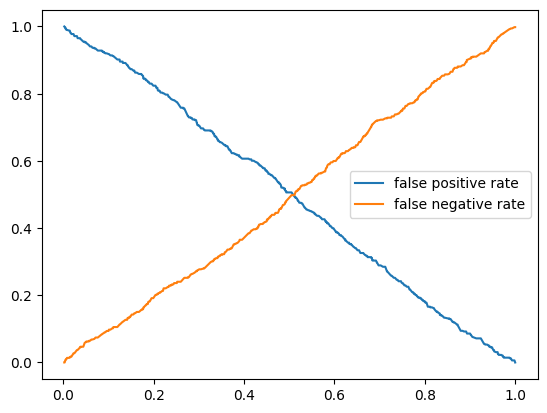

EER:  0.498046875
Optimal Threshold:  0.5115458140832015


(0.498046875, 0.5115458140832015)

In [8]:
scores = np.random.random(1000)

inter = np.random.random(1000)
labels = np.where(inter > 0.5, 1, 0)
calculate_eer(labels, scores)

# Test #6: 75% Correct Case

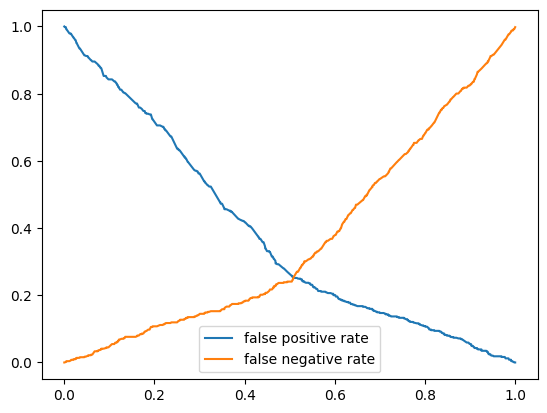

EER:  0.2535787321053263
Optimal Threshold:  0.5087315358212456


(0.2535787321053263, 0.5087315358212456)

In [9]:
scores = np.random.random(1000)

labels_correct = np.where(scores[:750] > 0.5, 1, 0)
labels_wrong = np.where(scores[750:] < 0.5, 1, 0)
labels = np.concatenate([labels_correct, labels_wrong])
calculate_eer(labels, scores)

# Test #7: 95% Real vs. 75% Fake

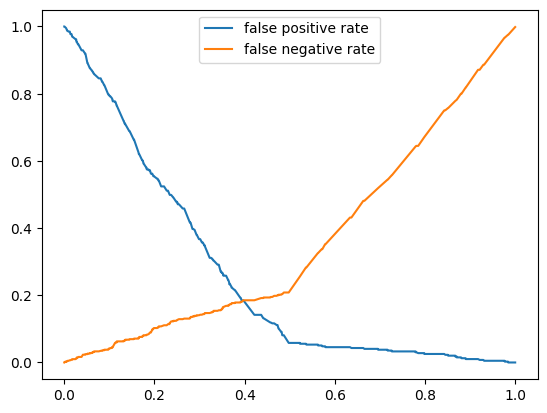

EER:  0.18481012658066903
Optimal Threshold:  0.39746359089425515


(0.18481012658066903, 0.39746359089425515)

In [19]:
scores_real = np.random.uniform(0.5, 1, 500)
labels_real = np.ones(500)

prob_correct_real = np.random.random(500)
flip = np.where(prob_correct_real > 0.05, 0, 1)

labels_real = abs(labels_real - flip)

scores_fake = np.random.uniform(0, 0.5, 500)
labels_fake = np.zeros(500)

prob_correct_fake = np.random.random(500)
flip = np.where(prob_correct_fake > 0.25, 0, 1)

labels_fake = abs(labels_fake - flip)

labels = np.concatenate([labels_real, labels_fake])
scores = np.concatenate([scores_real, scores_fake])
calculate_eer(labels, scores)

# Testing Another Function From GitHub

https://github.com/YuanGongND/python-compute-eer

In [24]:
import numpy as np
import sklearn.metrics

"""
Python compute equal error rate (eer)
ONLY tested on binary classification

:param label: ground-truth label, should be a 1-d list or np.array, each element represents the ground-truth label of one sample
:param pred: model prediction, should be a 1-d list or np.array, each element represents the model prediction of one sample
:param positive_label: the class that is viewed as positive class when computing EER
:return: equal error rate (EER)
"""
def compute_eer(label, pred, positive_label=1):
    # all fpr, tpr, fnr, fnr, threshold are lists (in the format of np.array)
    fpr, tpr, threshold = sklearn.metrics.roc_curve(label, pred)
    fnr = 1 - tpr

    # the threshold of fnr == fpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]

    # theoretically eer from fpr and eer from fnr should be identical but they can be slightly differ in reality
    eer_1 = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
    eer_2 = fnr[np.nanargmin(np.absolute((fnr - fpr)))]

    # return the mean of eer from fpr and from fnr
    eer = (eer_1 + eer_2) / 2
    return eer

In [25]:
compute_eer(labels, scores)

0.1849670467622136